# DetectingLanes for a Self-Driving Car

# Loading an image

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

In [0]:
image = cv2.imread('test_image.jpg')

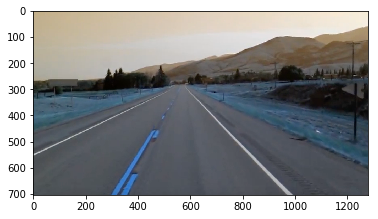

In [3]:
#Show the image with matplotlib
plt.imshow(image)
plt.show()

### Step 1- GrayScale Conversion

Copy of the image, otherwise original image will be affected as well if changes are made

In [0]:
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)  # make a copy of image to keep original same

In [0]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

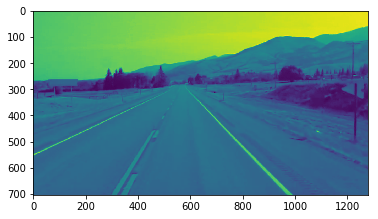

In [6]:
plt.imshow(gray)
plt.show()

### Step 2- Smoothening Image -  Reduce Noise

Add Guassian blur on image

- Gaussian filter is used to smoothen the image. or use customized "cv2.Canny()" instead
-  Idea 1: Kernel Convolution (Neighbours), Smooth by the average intensities
- Idea 2: Gaussian, 5x5 is god size for most cases, so gaussian blur by 
- convolving the image with a kernel of gaussian values

In [0]:
blur = cv2.GaussianBlur(gray, (5,5), 0) # variance is zero here

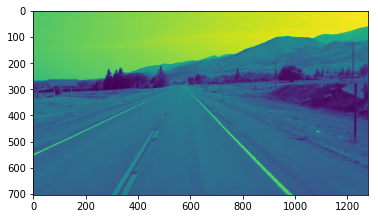

In [8]:
plt.imshow(blur)
plt.show()

### Step 3 -  Find lanes   i.e Edge detection
	
- 1-The notion of "derivative" to check the gradient , meaning the strong/weak change of the intensities: 
  
  derivative(f(x,y)) = the change in brightness over a series of pixels
  
- 2-So we will use "cv2.Canny(image, low, high)", it finds the strongest gradients. high if the gradient >  upper Th_h then it is accepted as an edge picture.
  
- 3-Ration = 1:2 or 1:3 is reccomended

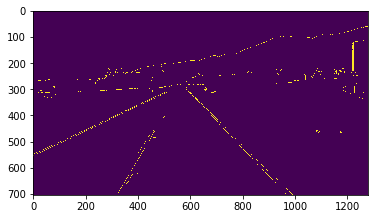

In [9]:
#Canny method to find lanes with low threshold of 50 and high threshold of 150
canny = cv2.Canny(blur, 50, 150)

plt.imshow(canny)
plt.show()


### Step 4- Region of interest

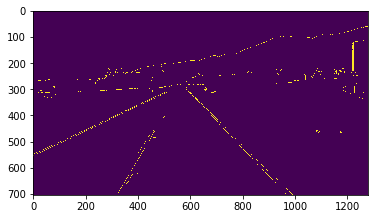

In [10]:
# Wrap canny into a function with all same procedure

def canny(image):
  gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny=canny(lane_image)

plt.imshow(canny)
plt.show()

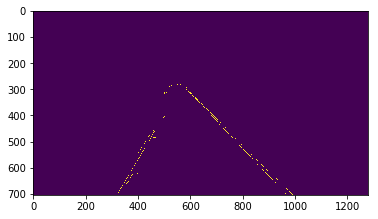

In [11]:
# Coming to define region of interest function

def canny(image):
  gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

def region_of_interest(image):
	height = image.shape[0]
	# apply the triangle as a black mask with the same dim as our image
	# OpenCV(4.1.0) ../modules/imgproc/src/drawing.cpp:2403: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'
	# fixed when used array of polygons 
	polygons = np.array([
			[(200, height), (1100, height), (550,250)]
		])

	# complete black since intensity = 0
	mask = np.zeros_like(image)

	# Polygon color = white
	cv2.fillPoly(mask,polygons, 255)
  
  # Element-wise calculations, used as filter

	masked_image = cv2.bitwise_and(image, mask)

	return masked_image


image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny=canny(lane_image)
cropped_image=region_of_interest(canny)
plt.imshow(cropped_image)
plt.show()

# Whole Story step-by-step

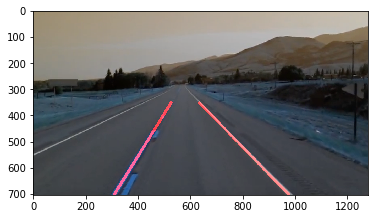

In [12]:
def make_coordinates(image, line_parameteres):
	slope , intercept = line_parameteres
	# y1 : starting height, y2 : ending height
	y1 = image.shape[0]
	y2 = int(y1*(2.5/5))

	# y = mx + b => x = (y-b)/m
	x1 = int((y1 - intercept)/slope)
	x2 = int((y2 - intercept)/slope)

	return np.array([x1, y1, x2, y2])



def canny(image):

	###############################
	#		Step 1 - GrayScale	  #
	###############################
	# Copy of the image, otherwise original image will be affected as well if changes are made
	
	gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

	#############################
	#   Step 2 -  Reduce Noise  #
	#############################
	# Gaussian filter is used to smoothen the image. or use customized "cv2.Canny()" instead
	# Idea 1: Kernel Convolution (Neighbours), Smooth by the average intensities
	# Idea 2: Gaussian, 5x5 is god size for most cases, so gaussian blur by 
	# convolving the image with a kernel of gaussian values
	blur = cv2.GaussianBlur(gray, (5,5), 0)

	#############################
	#    Step 3 -  Find lanes   #
	#############################
	# 1: The notion of "derivative" to check the gradient , meaning the strong/weak change 
	# of the intensities: derivative(f(x,y)) = the change in brightness over a series of pixels
	# 2: So we will use "cv2.Canny(image, low, high)", it finds the strongest gradients. high: 
	# if the gradient >  upper Th_h then it is accepted as an edge picture.
	# 3: Ration = 1:2 or 1:3 is reccomended
	canny = cv2.Canny(blur, 50, 150)
	return canny

def region_of_interest(image):
	height = image.shape[0]
	# apply the triangle as a black mask with the same dim as our image
	# OpenCV(4.1.0) ../modules/imgproc/src/drawing.cpp:2403: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'
	# fixed when used array of polygons 
	polygons = np.array([
			[(200, height), (1100, height), (550,250)]
		])

	# complete black since intensity = 0
	mask = np.zeros_like(image)

	# Polygon color = white
	cv2.fillPoly(mask,polygons, 255)

	# Element-wise calculations, used as filter

	masked_image = cv2.bitwise_and(image, mask)

	return masked_image

def display_lines(image, lines):
	line_image = np.zeros_like(image)
	# 1: Check if the array 2D of lines is not empty [[x1,y1,x2,y2]] (their form)
	# 2: Reshape the line into 1D [x1,y1,x2,y2] by using line.reshape(4) (1D array with 4 elements)
	# or we can unpack cv2.line(ar1, (x1,y1), (x2,y2), color, thickness), 
	# ar1(in whwich image you gonna create line)
	if lines is not None:
		for line in lines:
			x1, y1, x2, y2 = line.reshape(4)
			cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)

	return line_image

def average_slope_intercept(image, lines):
	left_fit = []
	right_fit = []
	for line in lines:
		x1, y1, x2, y2 = line.reshape(4)
		# polyfit(,,degree of linearity)
		parameteres = np.polyfit((x1,x2) , (y1,y2), 1)
		slope = parameteres[0]
		intercept = parameteres[1]
		if slope < 0:
			left_fit.append((slope, intercept))
		else:
			right_fit.append((slope, intercept))

	# aveage of these lines
	left_fit_average = np.average(left_fit, axis = 0)
	right_fit_average = np.average(right_fit, axis = 0)

	left_line = make_coordinates(image, left_fit_average)
	right_line = make_coordinates(image, right_fit_average)

	return np.array([left_line, right_line])




###############################
#    Step 1 -  Canny Image    #
###############################

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)  # make a copy of image to keep original same
#cv2.imshow('result1', image) |  cv2.waitKey(10000)
plt.imshow(image)
#plt.show()

canny_image = canny(lane_image)
plt.imshow(canny_image)
#plt.show()

#########################
#      Step 2 -  ROC    #
#########################
# * WHY? It is used as a filter , element-wise &
cropped_image = region_of_interest(canny_image)
plt.imshow(cropped_image)
#plt.show()




##################################
#   Step 3 -  Hough Transform    #
##################################
# Detect straight lines
# 1: Split hough space into a grid
# 2: For every point of intesection we cast votes, choose the maximum votes
# so, in this way we found (m,b) and the corresponding line that fits better
# 3: To avoid issues with vertical lines, ρ = xcosθ + ysinθ
# * HoughLinesP(ar1, ar2, ar3, ar4, ar5, ar6, ar7): ar2 (pixels), ar3(degree of precision), ar4(TH to accept
# canditate lines), ar5(what it ll return), ar6(minimum pixels for the line), ar7(distance in pixels
# between segmeneted lines) are  really important SIZE OF THE BINS the larger the bins the  
# less precision 1 radian = π / 180
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]),minLineLength = 40, maxLineGap = 5)
line_image = display_lines(lane_image, lines)
plt.imshow(line_image)
#plt.show()


###############################################
#   Step 4 -  Blend lines & Original image    #
###############################################
# * We need to sum the images. The black font of the line image (0) will not affect the rest image
# 1: Use addWeighted(image1, w1, image2, w2, w_sum), w1(all elements mul by 0.8 pixel intensities increased)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
plt.imshow(combo_image )
#plt.show()


###############################
#   Step 4 -  Optimization    #
###############################
# * Instead of having multiple lines we can find (slope, y-intercept) into a single line
average_lines = average_slope_intercept(lane_image, lines)
average_line_image = display_lines(lane_image, average_lines)
average_combo_image = cv2.addWeighted(lane_image, 0.8, average_line_image, 1, 1)
plt.imshow(average_combo_image)
plt.show()
